<a href="https://colab.research.google.com/github/AlxeverCodeX/git-github/blob/master/Hamoye__Stage_D_Lessons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [69]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

In [70]:

print("Training data: {}, {}".format(train_images.shape, train_labels.shape))
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)


In [71]:
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))


There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Label: 5')

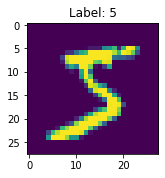

In [72]:

plt.figure(figsize=(8,5))
plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title('Label: {}'.format(train_labels[0]))

Text(0.5, 1.0, 'Label: 0')

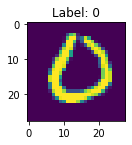

In [73]:
plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))

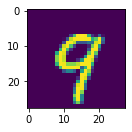

In [74]:
plt.subplot(1,3,3)
plt.imshow(test_images[12])
plt.show()

In [75]:
train_images = train_images/255.0
test_images = test_images/255.0


In [76]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

print("x_train: {}".format(x_train.shape))
print("x_val : {}".format(x_val.shape))
print("y_train: {}".format(y_train.shape))
print("y_val:{}".format (y_val.shape))

x_train: (50000, 28, 28)
x_val : (10000, 28, 28)
y_train: (50000,)
y_val:(10000,)


In [77]:
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [78]:

new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

print("x_train: {}".format(x_train.shape)) #prints  x_train: (50000, 784)
print("x_val: {}".format(x_val.shape)) #prints x_val: (10000, 784)
print("test_images: {}".format(test_images.shape)) #prints test_images: (10000, 784)

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [79]:

# inputs
#placeholders are not enabled in tf 2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

In [80]:

# building the model architecture

# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  # first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
  # second layer
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))
  # output layer
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

  return logits


In [81]:
logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01
#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

Running the model



In [82]:
#initialise the variables
init = tf.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(x_train)// batch_size

#train the models
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size
    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size 
      #average loss
      average_cost += loss/iteration
    print("Epoch========{}".format(epoch))
    #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))

Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.9140999913215637



Optimization for training deep neural networks

In [83]:
#Building a Sequential Feed Forward Network in Keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
#build the model object
model = Sequential()
#build the input and the hidden layers
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
# Build the output layer
model.add(Dense(no_labels, activation='softmax'))


Now that the model is in place, we configure the learning process using .compile(). Here we specify our loss function (or objective function). For our setting categorical cross entropy fits the bill, but in general other loss functions are available.

As for the optimizer of choice we'll use Adam with default settings. We could also instantiate an optimizer and set parameters before passing it to model.compile() but for this example the defaults will do.

We also choose which metrics will be evaluated during training and testing. We can pass any list of metrics - even build metrics ourselves - and have them displayed during training/testing.

In [84]:

model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])


Having compiled our model we can now start the training process. We have to specify how many times we want to iterate on the whole training set (epochs) and how many samples we use for one update to the model's weights (batch size).

In [85]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)

test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.6951 - acc: 0.8174 - val_loss: 0.2628 - val_acc: 0.9248
Epoch 2/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.2426 - acc: 0.9298 - val_loss: 0.1901 - val_acc: 0.9493
Epoch 3/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.1782 - acc: 0.9492 - val_loss: 0.1590 - val_acc: 0.9553
Epoch 4/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.1411 - acc: 0.9593 - val_loss: 0.1304 - val_acc: 0.9630
Epoch 5/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.1133 - acc: 0.9680 - val_loss: 0.1221 - val_acc: 0.9650
Epoch 6/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.0942 - acc: 0.9733 - val_loss: 0.1058 - val_acc: 0.9691
Epoch 7/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.0770 - acc: 0.9783 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - before regularisation')

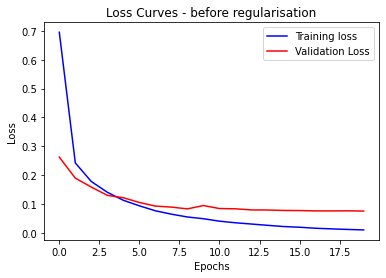

In [86]:
#Check for Overfitting

plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

In [87]:
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))

reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                            epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 36us/sample - loss: 0.9395 - acc: 0.7007 - val_loss: 0.2880 - val_acc: 0.9163
Epoch 2/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.3691 - acc: 0.8902 - val_loss: 0.2002 - val_acc: 0.9423
Epoch 3/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.2812 - acc: 0.9171 - val_loss: 0.1603 - val_acc: 0.9555
Epoch 4/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.2352 - acc: 0.9297 - val_loss: 0.1395 - val_acc: 0.9596
Epoch 5/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.1992 - acc: 0.9414 - val_loss: 0.1239 - val_acc: 0.9639
Epoch 6/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.1760 - acc: 0.9490 - val_loss: 0.1144 - val_acc: 0.9677
Epoch 7/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.1614 - acc: 0.9516 - val_loss: 0.

In [88]:
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Test loss: 0.06853712580979336
Test accuracy: 0.9804999828338623


Text(0.5, 1.0, 'Loss Curves - after regularisation')

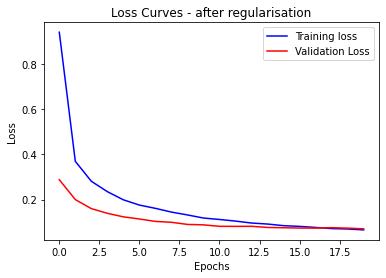

In [89]:
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')

In [90]:
#Making Predictions

In [95]:

prediction = model.predict(test_images)
print(prediction[209])

# 209 is just any random number, it could be 0 or anything.
# we can see here that we have some sort of array (probability) with different numbers, which is actually difficult to interpret.
# We will use the "argmax" fuction to index out the highest number from the array as our right prediction.
print("\n")
print(np.argmax(prediction[209]))

[1.5999652e-10 3.4620193e-09 4.6810573e-09 4.1027233e-05 2.8688193e-04
 1.5502064e-07 2.6785736e-14 2.7011945e-06 8.5970363e-08 9.9966908e-01]


9


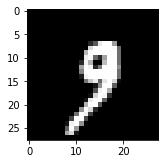

In [96]:

# Let's see whether the image would turn out to be 9
# Remember that the input data to the network were flattened for the purpose of learning to a vector with a length of 784. Before displaying it, we need to convert it back to the size of 28 x 28 pixels.
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[1000].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image

In [97]:

# You can try out others and play around with them
predictions = model.predict([test_images]) # Make prediction
print(np.argmax(predictions[6700])) # Print out the numbe

4


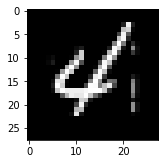

In [98]:
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[6700].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image